In [1]:
INPUT_FOLDER = "../nov29_135_mixtures_early_stop_skip3/"

In [2]:
#With a single mixture, all events/internal models are present. But how? Are they modelled less precisely?
#Testing here prediction accuracy for diff numbers of mixtures.
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [4]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [ ]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir(INPUT_FOLDER):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            print(num_mixtures)
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append(INPUT_FOLDER+folder)
            else:
                all_models[num_mixtures] = [INPUT_FOLDER+folder]
            
    return all_models
            
models = get_all_models()
rnn_analyzers = {}
filename = "rnn_trained_model.h5"
print(models)
for key, val in models.items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

5
3
1
3
1
3
1
1
1
5
1
1
5
5
5
3
1
5
1
1
5
1
5
3
3
3
5
3
5
3
3
3
1
5
1
5
1
1
1
5
5
5
1
5
5
5
3
1
3
5
3
3
5
1
3
3
1
3
1
3
5
5
5
3
1
1
3
1
3
3
3
5
1
5
3
{5: ['../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run2', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run8', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run9', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run11', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run14', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run3', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run7', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run23', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run15', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run6', '../nov29_135_mixtures_early_stop_skip3/t

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run8
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_349 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_350 (Conv2D)             (None, 32, 32, 32)   416         conv2d_349[0][0]                 
__________________________________________________________________________________________________
conv2d_351 (Conv2D)         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run7
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run15
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_369 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_370 (Conv2D)             (None, 32, 32, 32)   416         conv2d_369[0][0]                 
__________________________________________________________________________________________________
conv2d_371 (Conv2D)         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run25
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
_______________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run18
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_389 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_390 (Conv2D)             (None, 32, 32, 32)   416         conv2d_389[0][0]                 
__________________________________________________________________________________________________
conv2d_391 (Conv2D)         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run24
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
_______________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_409 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_410 (Conv2D)             (None, 32, 32, 32)   416         conv2d_409[0][0]                 
__________________________________________________________________________________________________
conv2d_411 (Conv2D)         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run20
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_429 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_430 (Conv2D)             (None, 32, 32, 32)   416         conv2d_429[0][0]                 
__________________________________________________________________________________________________
conv2d_431 (Conv2D)         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
_______________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run8
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_449 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_450 (Conv2D)             (None, 32, 32, 32)   416         conv2d_449[0][0]                 
__________________________________________________________________________________________________
conv2d_451 (Conv2D)          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_469 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 32, 32, 32)   416         conv2d_469[0][0]                 
__________________________________________________________________________________________________
conv2d_471 (Conv2D)          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run17
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
_______________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run16
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_489 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_490 (Conv2D)             (None, 32, 32, 32)   416         conv2d_489[0][0]                 
__________________________________________________________________________________________________
conv2d_491 (Conv2D)         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run18
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
_______________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_509 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_510 (Conv2D)             (None, 32, 32, 32)   416         conv2d_509[0][0]                 
__________________________________________________________________________________________________
conv2d_511 (Conv2D)          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Loading model:  ../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run23
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_529 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_530 (Conv2D)             (None, 32, 32, 32)   416         conv2d_529[0][0]                 
__________________________________________________________________________________________________
conv2d_531 (Conv2D)         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________


In [14]:
print(rnn_analyzers)

{5: [<analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc951430f0>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc949a4b70>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc93d23860>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc930c01d0>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc92413c18>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc917ebd30>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc90b71b38>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8feef7b8>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8f26bdd8>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8e5e8fd0>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8d9c1c88>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8cd47a58>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8c0c2710>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8b392e10>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fbc8a7a7b38>, <analyze_rnn_predictions.RNNAnalyze

In [7]:
import random
import numpy as np
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']
def fetch_random_observations_sequence(min_length = 201):
    fetched_data = False
    episode_num = random.randint(0,200)
    while not fetched_data:
        action_sequence = action_data[episode_num]
        latent_sequence = observation_data[episode_num]
        num_frames = len(latent_sequence)
        if num_frames >= min_length:
            fetched_data=True
        else:
            episode_num = random.randint(0,200)
    return latent_sequence, action_sequence

In [8]:
def make_one_step_predictions(rnn_analyzer, dream_steps=100):
    real_latent_sequence, action_sequence = fetch_random_observations_sequence(201)
    print("Seq length: ", real_latent_sequence.shape[0])
    #Analyzing a single model
    WARM_UP_STEPS = 100

    #Targets and actual predictions
    prediction_history = []
    target_history = []
    rnn_analyzer._reset()
    rnn_analyzer.warm_up_lstm(action_sequence[:WARM_UP_STEPS], real_latent_sequence[:WARM_UP_STEPS])
    
    real_previous_z = real_latent_sequence[WARM_UP_STEPS]
    real_previous_action = action_sequence[WARM_UP_STEPS]
    for i in range(dream_steps):
        prediction, mixture_weights = rnn_analyzer.predict_one_step(real_previous_action, real_previous_z, sigma_temp=0.01)
        prediction_history.append(prediction)
        real_previous_z = real_latent_sequence[WARM_UP_STEPS+i+1]
        real_previous_action = action_sequence[WARM_UP_STEPS+i+1]
        target_history.append(real_previous_z)
        
    return np.array(target_history), np.array(prediction_history)

In [9]:
def calc_mse_between_arrays(predicted_latents, actual_latents):
    return (np.square(predicted_latents - actual_latents)).mean(axis=None)

In [10]:
STATISTICAL_REPETITIONS = 5
num_mixtures_to_mean_error = []
for rep in range(STATISTICAL_REPETITIONS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        print(num_mixtures)
        for model in rnn_model_list:
            error_data={}
            predictions, actual = make_one_step_predictions(model)
            mse = calc_mse_between_arrays(predictions,actual)
            error_data["error"]=mse
            error_data["num_mixtures"] = num_mixtures
            num_mixtures_to_mean_error.append(error_data)

5
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  300
5
Seq length:  297
Seq length:  300
Seq length:  300
Seq length:  248
Seq length:  300
Seq length:  300
Seq length:  300
5
Seq length:  250
Seq length:  300
Seq length:  236
Seq length:  300
Seq length:  231
Seq length:  300
Seq length:  228
5
Seq length:  240
Seq length:  242
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  300
5
Seq length:  260
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  300
Seq length:  260
Seq length:  300


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


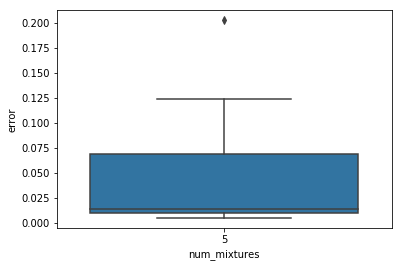

In [11]:
import seaborn as sns
import pandas as pd
num_mixtures_to_mean_error = pd.DataFrame(num_mixtures_to_mean_error)
sns.boxplot(x="num_mixtures", y="error", data=num_mixtures_to_mean_error)

In [46]:
mix1 = num_mixtures_to_mean_error[num_mixtures_to_mean_error["num_mixtures"]==1]["error"].tolist()
mix3 = num_mixtures_to_mean_error[num_mixtures_to_mean_error["num_mixtures"]==3]["error"].tolist()
mix5 = num_mixtures_to_mean_error[num_mixtures_to_mean_error["num_mixtures"]==5]["error"].tolist()
#print(mix1)
from scipy.stats import mannwhitneyu
print(mannwhitneyu(mix5,mix3))
print(mannwhitneyu(mix5,mix1))
print(np.mean(mix1))
print(np.mean(mix3))
print(np.mean(mix5))

MannwhitneyuResult(statistic=28039.0, pvalue=0.02343419487295861)
MannwhitneyuResult(statistic=23901.0, pvalue=0.21146710525908596)
0.04739806617427125
0.04414430091320229
0.04479665729719781


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/scipy/stats/stats.py:4885: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/scipy/stats/stats.py:4885: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


In [ ]:
#With 4 mixtures
many_mse_observations_4 = []
for i in range(50):
    targets, predictions = make_one_step_predictions(rnn_analyzer)
    many_mse_observations_4.append(calc_mse_between_arrays(targets, predictions))

In [ ]:
#With 1 mixture
many_mse_observations_1 = []
for i in range(50):
    targets, predictions = make_one_step_predictions(rnn_analyzer_1)
    many_mse_observations_1.append(calc_mse_between_arrays(targets, predictions))

In [ ]:
avg1 = np.average(np.array(many_mse_observations_1))
print(avg1)
avg4 = np.average(np.array(many_mse_observations_4))
print(avg4)

In [ ]:
new_analyzer = analyze_rnn_predictions.RNNAnalyzer("../trained_sequential_rnn_4mixtures_run9/rnn_trained_model.h5", 4, 0.01)
weights, zs = calc_mixture_weights_and_events_dreaming(new_analyzer)
decoded_images = new_analyzer.decode_with_vae(zs)
plot_movie_mp4(decoded_images)

In [ ]:
import count_monsters_and_balls
import numpy as np
import collections
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39

def count_appearances_of_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][1]

def name_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][0]

import pandas as pd

#Based on a dream, generates a dict indexed by mixture ID (e.g. 1-4) where each mixture has 
#a list of events, and how many of those it generated. Example:
#{"m1": {"explode": 4, "wall: 5"}, "m2": {"explode": 1, "wall": 22}}
def count_events_in_each_mixture(analyzer, num_mixtures, num_steps = 100):
    weights, zs = calc_mixture_weights_and_events_dreaming(analyzer,num_steps)
    decoded_images = analyzer.decode_with_vae(zs)
    visualize_mixture_weights_and_events(weights, zs, analyzer)
    mixtures_events_counter={}    
    
    for num in range(num_mixtures):
        mixtures_events_counter[num] = {"mixture_num" : num, "explosion":0, "left_wall": 0, "right_wall": 0, "other": 0}
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        weight_vector = weights[img_counter]
        dominating_mixture = np.argmax(weight_vector)
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
        is_fireball, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
        is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
        is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

        if is_exploding:
            mixtures_events_counter[dominating_mixture]["explosion"] += 1
        elif is_left_wall:
            mixtures_events_counter[dominating_mixture]["left_wall"] += 1
        elif is_right_wall:
            mixtures_events_counter[dominating_mixture]["right_wall"] += 1
        else:
            mixtures_events_counter[dominating_mixture]["other"] += 1

    return mixtures_events_counter
               

In [ ]:
import pandas as pd
mixture_event_summaries = []
STATISTICAL_REPETITIONS = 5#20
SEQUENCE_LENGTH = 1000
num_mixtures = 4
model_to_analyze = rnn_analyzer
for rep in range(STATISTICAL_REPETITIONS):
    event_mixture_dict = count_events_in_each_mixture(model_to_analyze, num_mixtures, SEQUENCE_LENGTH)
    mixture_event_summaries.append(event_mixture_dict)
    
mixture_event_dataframe = pd.DataFrame(mixture_event_summaries)
print(mixture_event_dataframe)

In [ ]:
#Transforming the dict to the kind of dataframe we want
mixture_summaries = []
potential_events = ["explosion", "left_wall", "right_wall", "other"]
for current_measure in mixture_event_summaries:
    for num_mixtures, event_data in current_measure.items():
        for e in potential_events:
            entry = {"mixture_num" : event_data["mixture_num"], "event" : e, "observations":event_data[e]}
            mixture_summaries.append(entry)
        
print(mixture_summaries)
mixture_summaries=pd.DataFrame(mixture_summaries)

In [ ]:
#print(mixture_summaries)
import seaborn as sns
sns.catplot(x="event", y="observations", kind="box", data=mixture_summaries, hue="mixture_num")

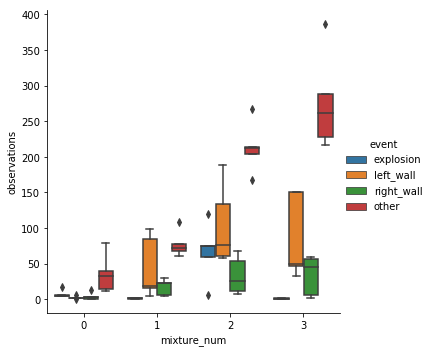

In [33]:
sns.catplot(x="mixture_num", y="observations", kind="box", data=mixture_summaries, hue="event")

In [20]:
def count_events_in_main_vs_other_mixtures(events_dataframe, event_name, main_mixture_summary, summary_num_events_dataframe):
    #Helps analyze if one mixture typically takes responsability
    #for analyzing one specific event.
    
    #Counting how often the event is present in the most common mixture,
    #vs all the others.
    event_in_main_mixture = events_dataframe[event_name+"_main"]
    event_in_other_mixtures = events_dataframe[event_name+"_other"]
    id_of_main_mixture = [d[event_name] for d in main_mixture_summary]
    
    total_num_main_mixture = []
    total_num_all_mixtures = []
    summary_num_events_dataframe=summary_num_events_dataframe.fillna(0)
    for index, row in summary_num_events_dataframe.iterrows():
        total_num_main_mixture.append(row[id_of_main_mixture[index]])
        total_num_all_mixtures.append(sum(row))

    total_non_main_mixture = np.subtract(np.array(total_num_all_mixtures), total_num_main_mixture)
    event_proportion_in_main=np.divide(event_in_main_mixture,np.add(event_in_other_mixtures,event_in_main_mixture))
    total_proportion_in_main=np.divide(total_num_main_mixture,total_num_all_mixtures)
                                
                                
    main_mixture_dict = {event_name: event_in_main_mixture,
                  "total" : total_num_main_mixture,
                        "main_mixture": "Yes"}
    non_main_mixture_dict = {event_name: event_in_other_mixtures,
                  "total": total_non_main_mixture,
                                "main_mixture":"No"}
    
    
    #Measures difference between: (Event modelled my MainMixture/TotalNumEvent) and
    #(total modelled by MainMixture/ totalAllEvents)
    main_model_proportion_dict_event = {event_name+"_proportion" : event_proportion_in_main, "event_only" :"Yes"}
    main_model_proportion_dict_total = {event_name+"_proportion": total_proportion_in_main, "event_only" : "No"}
    
    return_frame = pd.DataFrame(main_mixture_dict)
    return_frame_b = pd.DataFrame(non_main_mixture_dict)
    return_frame= return_frame.append(return_frame_b)
    
    main_model_proportion_frame = pd.DataFrame(main_model_proportion_dict_event)
    main_model_proportion_frame_b = pd.DataFrame(main_model_proportion_dict_total)
    main_model_proportion_frame = main_model_proportion_frame.append(main_model_proportion_frame_b)
    return return_frame, main_model_proportion_frame

In [21]:
from scipy.stats import mannwhitneyu

def significance_test(dataframe, event_name):
    #Does two tests of significance:
    #1. Are there significantly more occurences of event event_name
    #in the "main" mixture than in the others?
    #2. Are there significant differences between the number of total
    #events in the main mixture than others?
    #The latter controls for situations where all/very many events
    #end up being modelled by 1 mixture.
    main_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'Yes']
    other_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'No']
    event_main = main_mixture_data[event_name]
    total_main = main_mixture_data['total']
    event_other = other_mixture_data[event_name]
    total_other = other_mixture_data['total']
    
    print("Significant differences between number of the event in main vs all other mixtures")
    print("Significant differences between number of ANY event in main vs all other mixtures")

    print(mannwhitneyu(event_main, event_other, alternative='two-sided'))
    print(mannwhitneyu(total_main, total_other, alternative='two-sided'))

In [41]:
def significance_test_proportions_frame(proportions_frame):
    #Test if the "main mixture" is significantly more common for the
    #event∕situation than it is overall.
    event_only_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'Yes']
    total_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'No']
        
    print("Significant differences between proportion of the mixture in event vs in all frames")
    print(mannwhitneyu(event_only_proportion[event_only_proportion.columns[0]], total_proportion[total_proportion.columns[0]], alternative='two-sided'))

## Explosions

In [23]:
explosions_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "explosion", main_mixture_summary, summary_num_events_dataframe)
print(explosions_data)
pd.melt(explosions_data, id_vars=['main_mixture'])

    explosion  total main_mixture
0          19    577          Yes
1          10    189          Yes
2         127    276          Yes
3           4    174          Yes
4         168    248          Yes
5         114    277          Yes
6         400    487          Yes
7         155    568          Yes
8          21    167          Yes
9          73    220          Yes
10         96    219          Yes
11         45    228          Yes
12        138    573          Yes
13         49    184          Yes
14         64    168          Yes
15        149    421          Yes
16         74    115          Yes
17          0     85          Yes
18         90    187          Yes
19          0    750          Yes
20         32    177          Yes
21        130    305          Yes
22        226    260          Yes
23         69    211          Yes
24         75    505          Yes
25         64    212          Yes
26         81    312          Yes
27        261    441          Yes
28         33 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


,main_mixture,variable,value
0,Yes,explosion,19
1,Yes,explosion,10
2,Yes,explosion,127
3,Yes,explosion,4
4,Yes,explosion,168
5,Yes,explosion,114
6,Yes,explosion,400
7,Yes,explosion,155
8,Yes,explosion,21
9,Yes,explosion,73


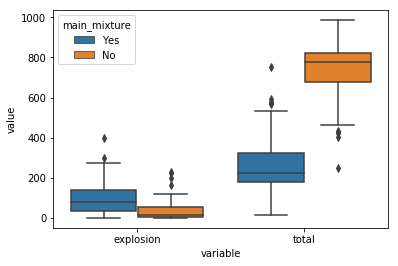

In [24]:
import seaborn as sns
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(explosions_data, id_vars=['main_mixture']))



In [25]:
significance_test(explosions_data, 'explosion')

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2639.5, pvalue=1.0572780502652836e-05)
MannwhitneyuResult(statistic=119.0, pvalue=1.1405280639276962e-18)


Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=2943.0, pvalue=2.013482242406131e-09)
None


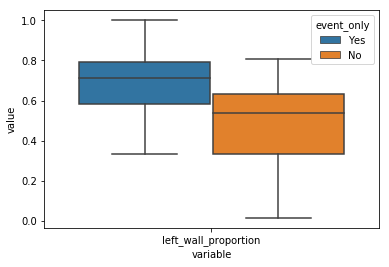

In [42]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Left Walls

In [44]:
left_walls_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "left_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(left_walls_data, "left_wall")
#Result: Left wall far more common in main mixture. However, the total
#distribution of this mixture is not significantly larger than others.
pd.melt(left_walls_data, id_vars=['main_mixture'])

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2618.5, pvalue=1.750598857121085e-05)
MannwhitneyuResult(statistic=1686.0, pvalue=0.5513564288171047)


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


,main_mixture,variable,value
0,Yes,left_wall,113
1,Yes,left_wall,98
2,Yes,left_wall,111
3,Yes,left_wall,49
4,Yes,left_wall,22
5,Yes,left_wall,41
6,Yes,left_wall,17
7,Yes,left_wall,7
8,Yes,left_wall,5
9,Yes,left_wall,45


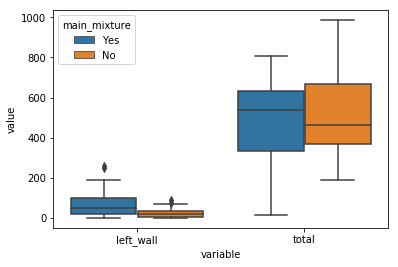

In [31]:
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(left_walls_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=2943.0, pvalue=2.013482242406131e-09)
None


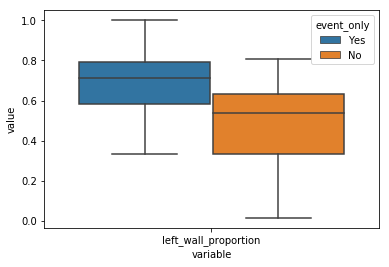

In [45]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Right Walls

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2226.0, pvalue=0.02391217629842082)
MannwhitneyuResult(statistic=938.0, pvalue=6.133518159294231e-06)


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


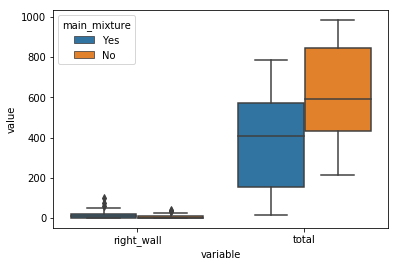

In [46]:
right_walls_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "right_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(right_walls_data, "right_wall")
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(right_walls_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=3168.5, pvalue=6.933062385866509e-13)
None


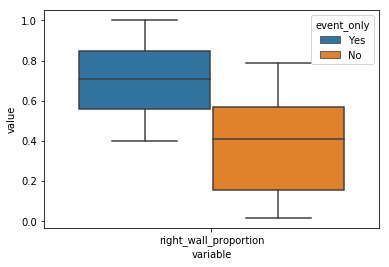

In [47]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Fireballs

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2475.5, pvalue=0.00039559753785814976)
MannwhitneyuResult(statistic=2615.0, pvalue=1.9104690646102346e-05)


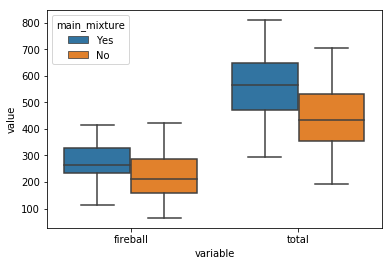

In [49]:
fireball_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball", main_mixture_summary, summary_num_events_dataframe)
significance_test(fireball_data, "fireball")
#Fireball more common in main mixture, but this mixture is so dominating
#that this is to be expected.
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(fireball_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1768.0, pvalue=0.8686818987976536)
None


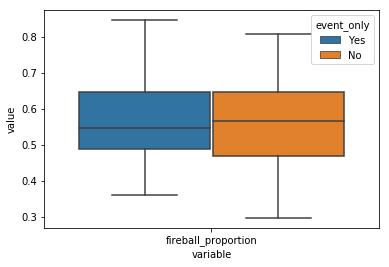

In [50]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))